<a href="https://colab.research.google.com/github/KaioViana/data-science-primeiros-passos/blob/master/introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análises de um dataset de avaliação de filmes real fornecido pelo GroupLens**

In [1]:
# subindo os arquivos para análise
from google.colab import files
up = files.upload()

Saving ratings.csv to ratings.csv


In [3]:
import pandas as pd
notas = pd.read_csv('ratings.csv')
# os cinco primeiros dados do arquivo
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# vendo o formato do dataframe
notas.shape

(100836, 4)

In [7]:
# mudando o nome das colunas
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head() # vendo novamente

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
# mostrando os valores únicos da coluna 'nota'
sorted(notas['nota'].unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [26]:
# contando a frequência de cada nota
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [35]:
# média das notas
print('Média', notas['nota'].mean())
print('Mediana', notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [29]:
# maneira diferente de ler um coluna
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

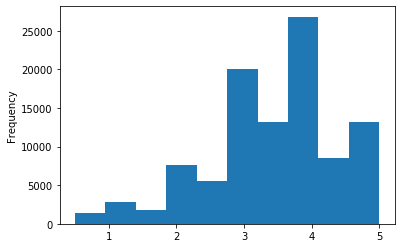

In [34]:
# plotando histograma dos valores da coluna nota
notas.nota.plot(kind='hist')

In [36]:
# Descrevendo os dados (diversas medidas de descrição)
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

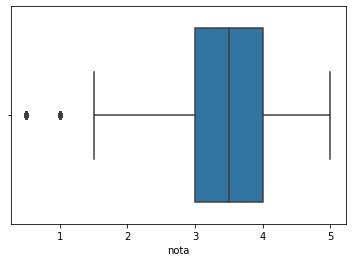

In [40]:
# Seaborn
import seaborn as sns
# boxplot
sns.boxplot(notas.nota)